In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
%matplotlib inline

### Datasets

In [16]:
# departements and aisle id
aisles = pd.read_csv('./data/aisles.csv')
departements = pd.read_csv('./data/departments.csv')
products = pd.read_csv('./data/products.csv')
product_mapping = products[['product_id','product_name']].set_index('product_id').to_dict()['product_name']
print(aisles.head(3))
print(departements.head(3))
print(products.head(3))

   aisle_id                  aisle
0         1  prepared soups salads
1         2      specialty cheeses
2         3    energy granola bars
   department_id department
0              1     frozen
1              2      other
2              3     bakery
   product_id                          product_name  aisle_id  department_id
0           1            Chocolate Sandwich Cookies        61             19
1           2                      All-Seasons Salt       104             13
2           3  Robust Golden Unsweetened Oolong Tea        94              7


In [11]:
# Products purchased in each order. 
# Order_products__prior.csv : contains previous order contents for all customers. 
# 'reordered' customer has a previous order with this product
order_products = pd.read_csv('./data/order_products__prior.csv')
order_products.head(3)

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0


In [15]:
# Order with sets (prior, train, test). 
# You are predicting reordered items only for the test set orders. 
# 'order_dow' is the day of week
orders = pd.read_csv('./data/orders.csv')
orders.sample(3)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
1224547,861633,73594,prior,3,1,20,30.0
2182557,158220,131400,prior,16,1,7,8.0
173953,27947,10511,prior,4,6,15,10.0


### Products

Mean number of products per order : 10


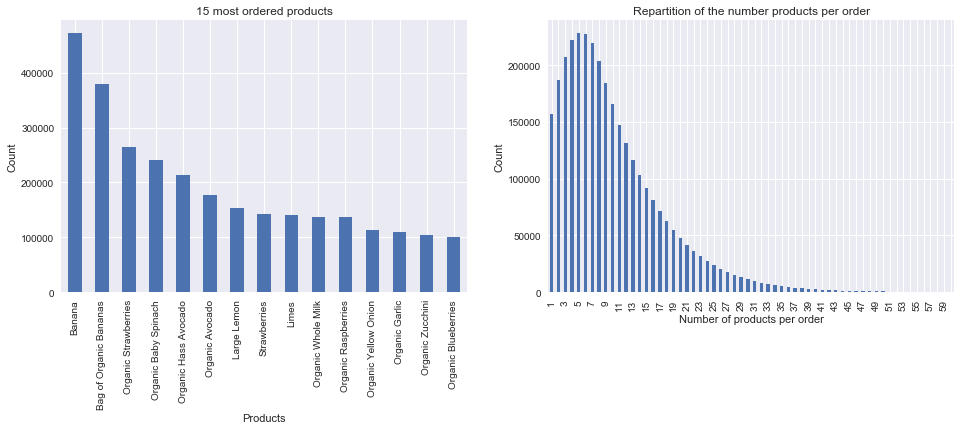

In [181]:
def clear_xtick(tick):
    t = int(tick)
    if t % 2 ==0:
        return ''
    else:
        return t

f, ax = plt.subplots(figsize=(16,5), ncols=2)
top_k = 15
order_products.product_id.value_counts()[:top_k].plot('bar', ax=ax[0])
_ = ax[0].set_title('%s most ordered products' % top_k)
_ = ax[0].set_xlabel('Products')
_ = ax[0].set_ylabel('Count')
_ = ax[0].set_xticklabels([product_mapping[int(k.get_text())] for k in ax[0].get_xticklabels()])

prod_id_col = order_products.groupby('order_id').count()['product_id']
prod_id_col.value_counts().sort_index()[:60].plot('bar', ax=ax[1])
_ = ax[1].set_title('Repartition of the number products per order')
_ = ax[1].set_xlabel('Number of products per order')
_ = ax[1].set_ylabel('Count')
_ = ax[1].set_xticklabels([clear_xtick(k.get_text()) for k in ax[1].get_xticklabels()])
print('Mean number of products per order : %d' % prod_id_col.mean())

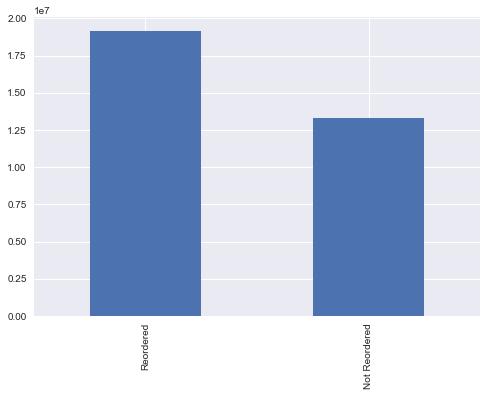

In [188]:
f, ax = plt.subplots(ncols=2)
_ = order_products.reordered.value_counts().plot('bar', ax =ax[0])
_ = ax[0].set_xticklabels([{0:'Not Reordered', 1: 'Reordered'}.get(int(k.get_text())) for k in ax[0].get_xticklabels()])

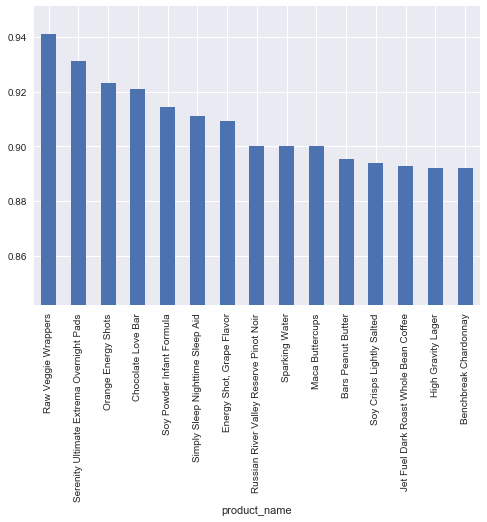

In [215]:
reord = order_products.groupby('product_id').agg({'order_id':'count', 'reordered':"mean"})
reord = pd.merge(reord, products, right_on='product_id', left_index=True).sort_values('reordered', ascending=False)
reord[:15].set_index('product_name')['reordered'].plot('bar')
_ = plt.ylim([reord[:15].reordered.min()- 0.05, reord[:15].reordered.max()+0.01])

### Orders distribution 

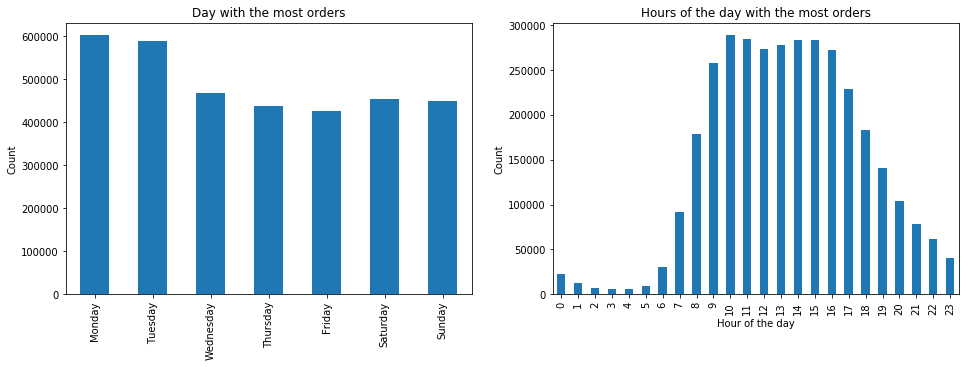

In [158]:
f, ax = plt.subplots(figsize=(16,5), ncols=2)
top_k = 15
orders.order_dow.value_counts().sort_index().plot('bar', ax=ax[0])
_ = ax[0].set_title('Day with the most orders')
_ = ax[0].set_ylabel('Count')
_ = ax[0].set_xticklabels([calendar.day_name[int(k.get_text())] for k in ax[0].get_xticklabels()])

orders.order_hour_of_day.value_counts().sort_index().plot('bar', ax=ax[1])
_ = ax[1].set_title('Hours of the day with the most orders')
_ = ax[1].set_xlabel('Hour of the day')
_ = ax[1].set_ylabel('Count')

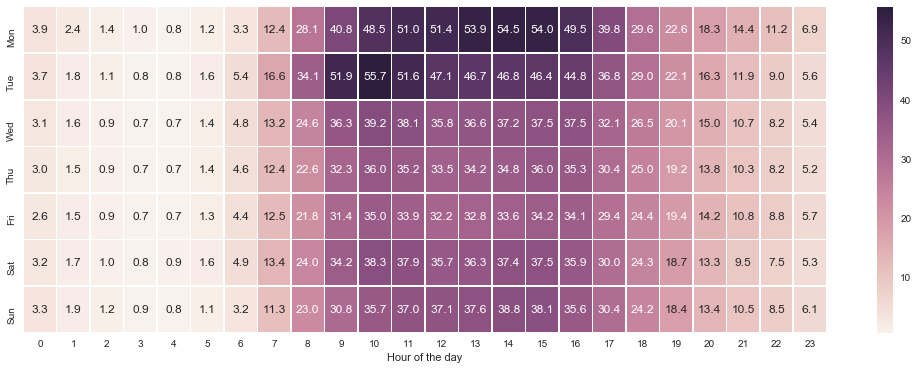

In [176]:
f, ax = plt.subplots(figsize=(18,6))
d = orders.pivot_table(index='order_dow', columns='order_hour_of_day', values='order_id', aggfunc=lambda x:round(len(x)*0.001,2)).fillna(0)
f = sns.heatmap(d, annot=True, fmt="1.1f", linewidths=.5, ax=ax) 
_ = ax.set_yticklabels([calendar.day_name[int(k.get_text())][:3] for k in ax.get_yticklabels()])
_ = ax.set_ylabel('')
_ = ax.set_xlabel('Hour of the day')


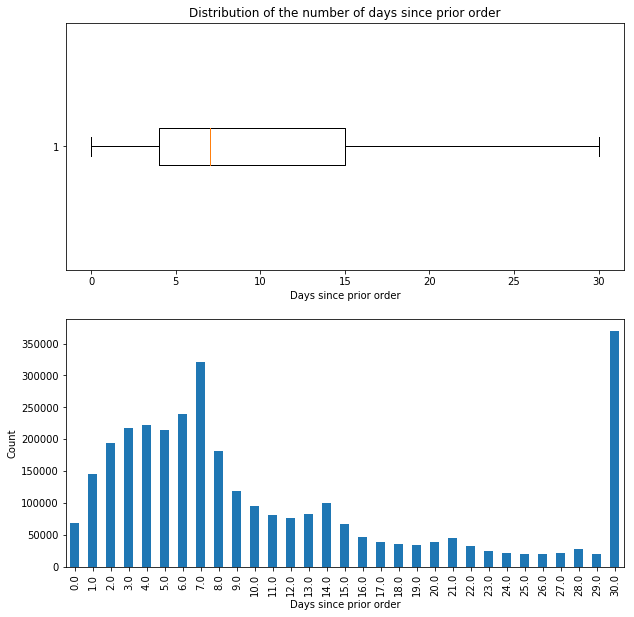

In [161]:
f, ax = plt.subplots(figsize=(10,10), nrows=2)
_ = ax[0].boxplot(list(orders.days_since_prior_order.dropna()), 0, 'rs', 0)
_ = ax[0].set_xlabel('Days since prior order')
_ = ax[0].set_title('Distribution of the number of days since prior order')

orders.days_since_prior_order.value_counts().sort_index().plot('bar', ax=ax[1])
_ = ax[1].set_xlabel('Days since prior order')
_ = ax[1].set_ylabel('Count')